In [12]:
import matplotlib
# matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from struc import make_func_group_gauss_sum, Structure, make_func_group_gauss
from create_structures import create_structures
from load_structures import load_structures
from many_plots import many_plots

Масштаб частот > 2000: 0.96;
              <= 2000: 0.98

## Структуры содержащие воду:

В таблице ниже приведены характеристики структур, в которых входит вода:

| Название структуры | Описание | Количество молекул воды |
| --- | --- | --- |
| g104w3 | Эпоксидные группы и 3 молекулы воды на расстоянии 2.04 Ангстрема от них | 3 |
| gketoohw1 | Одна молекула воды, связанная с двумя гидроксильными группами водородными связями | 1 |
| 104oh6w6 | Эпоксидныеи гидроксильные группы. Вода связана водородными связями с частью из гидроксильных групп | 6 |

In [4]:
structure_with_water = ['g104w3', '104oh6w6', 'gketoohw1']
all_groups = ['carbon', 'water', 'carboxyl', 'hydroxide', 'ketone', 'epoxide']

In [27]:
create_structures(structure_with_water)
structs = load_structures(structure_with_water)

New structures successfully created!


Посмотрим на спекры этих структур:

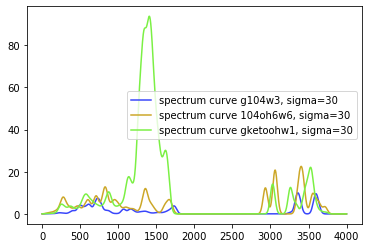

In [7]:
structs['g104w3'].pm.spectrum_curve(sigma_=30, color='rand')
structs['104oh6w6'].pm.spectrum_curve(sigma_=30, color='rand')
structs['gketoohw1'].pm.spectrum_curve(sigma_=30, color='rand')
plt.legend()
plt.show()

<i>Рисунок 1. Сравнение спектров для трех структур содержащих воду.</i>

Из рисунка видно, что спектр структуры gketoohw1 значительно отличается 
по интенсивности от двух других спектров в области в районе 1500 см-2. 
Это обусловлено наличием большого количества гидрооксильных групп:

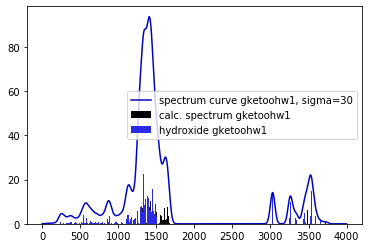

In [10]:
structs['gketoohw1'].pm.spectrum_curve(color='rand')
structs['gketoohw1'].pm.spectrum_bar()
structs['gketoohw1'].pm.fg_bar(fg_list=['hydroxide'])

plt.legend()
plt.show()


Сравним положение пиков воды для всех трех структур:

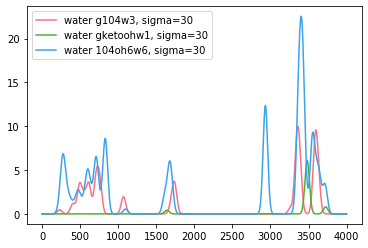

In [14]:
func_groups = ['water']
structures = [structs['g104w3'], structs['gketoohw1'], structs['104oh6w6']]
# make_sum_spectra(structures, func_groups)
# make_func_group_gauss_sum(structures=structures, func_groups=func_groups, color='rand')
many_plots(structures_list=structures, func='fg_sum_curve', fg_list=func_groups)
plt.legend()
plt.show()

Рассмотрим отдльно каждый спектр:
## gketoohw1

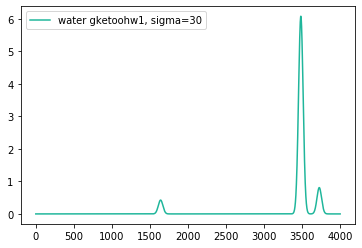

In [15]:
structs['gketoohw1'].pm.fg_sum_curve(fg_list=func_groups)
# make_func_group_gauss_sum(structures=[struct_gketoohw1], func_groups=func_groups)
plt.legend()

Видно, что в спектре меньше полос, чем для других структур. Посмотрим на полосы, соответсвующие взаимодействию гидроксильной группы с водой.

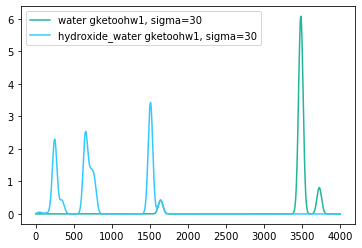

In [16]:
structs['gketoohw1'].pm.fg_sum_curve(fg_list=['water', 'hydroxide_water'])
# make_func_group_gauss_sum(structures=[struct_gketoohw1], 
#                           func_groups=['water', 'hydroxide_water'])
plt.legend()

В таблице 2 даны положения полученных пиков и их описания.

<i>Таблица 2. Положение пиков и описание в структуре gketoohw1</i>

| Положение пика, см-1 | Тип | Описание |
| --- | --- | --- |
| 3724 | OH STRE | Преимущественно вдоль связи OH не связанного водородными связями атома водорода |
| 3482 | OH STRE | Преимущественно связанный с гидроксильной группой атом водорода |
| 1640 | HOH ANG | Изменение угла H-O-H |
| *1506 | HOH ANG | Изменение угла C-O-H в водородносвязной OH группе |

Взаимодействее с OH группами в первую очередь влияет на изменение двугранных углов
в длинноволновой области.

In [17]:
o_hw_length = 1.88442
h_ow_length = 1.82945
print('Длина водородной связи от гидроксильной группы до кислорода воды:', h_ow_length)
print('Длина водородной связи от гидроксильной группы до водорода воды:', o_hw_length)
print('Среднее:', np.mean([o_hw_length, h_ow_length]))

Длина водородной связи от гидроксильной группы до кислорода воды: 1.82945
Длина водородной связи от гидроксильной группы до водорода воды: 1.88442
Среднее: 1.856935


## g104w3
Полосы воды:

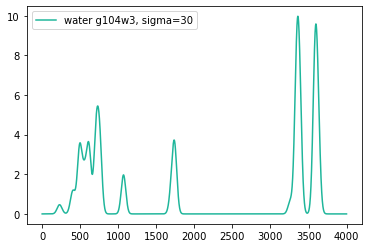

In [18]:
structs['g104w3'].pm.fg_sum_curve(fg_list=['water', 'hydroxide_water'])
# make_func_group_gauss_sum(structures=[struct_g104w3], 
#                           func_groups=['water', 'hydroxide_water'])
plt.legend()


Положения пиков:

<i>Таблица 2. Положение пиков и описание в структуре g104w3</i>

| Положение пика, см-1 | Тип | Описание |
| --- | --- | --- |
| 3597 | OH STRE | Преимущественно вдоль связи OH атомов водорода, направленных к эпоксидным группам (не связанных в.с. с другими молеклами воды) |
| 3360 | OH STRE | Преимущественно связанный в.с. с другими молекулами воды |
| 1734 | HOH ANG | Совместное изменение углов в ансамбле из 3 молекул |
| 1067 | HOH-HOH ANG | Изменение углов между плоскостями соседних молекул воды |


In [19]:
print('Среднее расстояние эпоксидная группа - H(из воды):', np.mean([2.07251, 2.07032, 2.03769]))
print('Средняя длинна водородной связи вода-вода:', np.mean([1.83899, 1.87441, 1.84637]))

Среднее расстояние эпоксидная группа - H(из воды): 2.060173333333333
Средняя длинна водородной связи вода-вода: 1.8532566666666668


## 104oh6w6
Полосы воды:

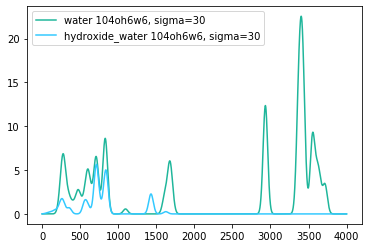

In [20]:
structs['104oh6w6'].pm.fg_sum_curve(fg_list=['water', 'hydroxide_water'])
# make_func_group_gauss_sum(structures=[struct_104oh6w6], 
#                           func_groups=['water', 'hydroxide_water'])
plt.legend()

Положения пиков:

<i>Таблица 2. Положение пиков и описание в структуре 104oh6w6</i>

| Положение пика, см-1 | Тип | Описание |
| --- | --- | --- |
| 3711 | OH STRE | Вдоль OH не направленных ни к одной из функ. групп |
| 3557 | OH STRE | Атомы водорода с слабыми водородными связями (1.99 - 2.05А) |
| 3402 | OH STRE | Атомы водорода с более сильными водородными связями (1.81 А) |
| 2933 | OH STRE | Атомы водорода с очень сильными водородными связями (1.60 А) |
| 1676 | HOH ANG | Совместное изменение углов в ансамбле из нескольких (или одной) молекул воды |
| *1430 | HOH ANG | Изменение угла C-O-H в водородносвязной OH группе |
| 1095 | HOH-HOH ANG | Изменение углов между плоскостями соседних молекул воды и OH групп|

In [21]:
hb_w_length = [1.80699, 1.79837, 1.84834]
hb_oh_length = [1.84933, 1.93160, 1.75044 ]
hb_length = hb_w_length + hb_oh_length
print('Средняя длина слабой водородной связи:', np.mean([1.99, 2.05]))
print('Средняя длина средней водородной связи:',  np.mean(hb_length))
print('Средняя длина сильной водородной связи:',  1.60)

Средняя длина слабой водородной связи: 2.02
Средняя длина средней водородной связи: 1.830845
Средняя длина сильной водородной связи: 1.6


## Тример воды

In [29]:
create_structures(['water3'])
structs = {**structs, **load_structures(['water3'])}

New structures successfully created!


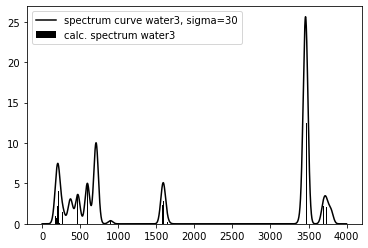

In [40]:
structs['water3'].pm.spectrum_curve()
structs['water3'].pm.spectrum_bar()
plt.legend()

## Сравнение структур
1. Диапазон 3000 - 4000 см-1, валентные колебания

| Длина в.с., A | gketoohw1,см-1 | g104w3, см-1 | 104oh6w6, см-1 | water3, см-1 |
| --- | --- | --- | --- | --- |
| нет в.с. | 3724 | - | 3711 | 3719 |
| 2.02 - 2.07 | - | 3597 | 3557 | - |
| 1.83 - 1.90| 3482 | 3360 | 3402 | 3460 |
| 1.6 | - | - | 2933 | - |

При взаимодействии тримера воды с эпоксидными группами водородные связи тримера упрочняются

Построим график зависимости частоты от длины в.с.

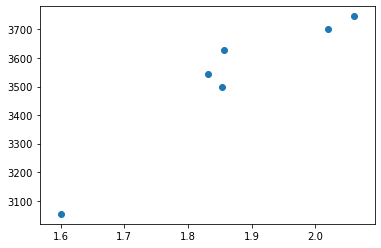

In [22]:
length = np.array([1.856935, 2.060173, 1.853257, 2.02, 1.830845, 1.6])
freq = np.array([3628, 3746, 3499, 3702, 3545, 3054])
plt.scatter(length, freq)

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
X = []
i = 0
for l in length:
    X.append([l, 1])
    i += 1
X = np.array(X)
y = freq
model = LinearRegression()
model.fit(X, y)
print('w1:', model.coef_)
w2 = np.mean(freq - np.dot(X, model.coef_.reshape(2, 1)))
print('w2:', w2)
print('R^2:', model.score(X, freq))


w1: [1453.01689863    0.        ]
w2: 811.5653744788788
R^2: 0.8991001502761803


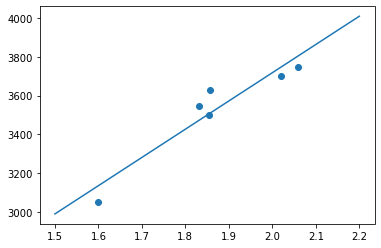

In [24]:
x = np.arange(1.5, 2.2, 0.1)
y = model.coef_[0] * x + w2
plt.scatter(length, freq)
plt.plot(x, y)

2. Диапазон 1090 - 1770 см-1

| Тип колебаний | gketoohw1,см-1 | g104w3, см-1 | 104oh6w6, см-1 | water3, см-1 |
| --- | --- | --- | --- | --- |
| Ножничные | 1640 | 1734 | 1676 | 1590 |
| | *1506 | - | *1430 | - |
| $${\mathcal{\tau}}$$ | - | 1067 | 1095 | 898 |


Сдвиги относительно тримера воды:

| Тип колебаний | gketoohw1,см-1 | g104w3, см-1 | 104oh6w6, см-1 |
| --- | --- | --- | --- |
| Ножничные | 50 | 144 | 86 |
| $${\mathcal{\tau}}$$ | - | 169 | 197 |




## Взаимодействие с лактольными  и лактонными группами

Вода не очень сильно связана с лактонной группой, длина водородной связи 
<img src="images/lactone_water.jpg" style="display: inline-block; max-height: 200px;">